<hr/>
<h3 class="alert alert-success alertsuccess" style="margin-top: 15px" align ='center'>
 Import Libraries
</h3>
<hr/>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# for Data manipulation
import numpy as np
import pandas as pd
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from ydata_profiling import ProfileReport


<hr/>
<h3 class="alert alert-success alertsuccess" style="margin-top: 10px" align ='center'>
 Load Data & Get Overview of Data
</h3>
<hr/>

In [2]:
df = pd.read_csv(r"/kaggle/input/house-price/1553768847-housing.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

<details><summary> Dataset Description</summary> 


This dataset appears to be related to real estate or housing, likely derived from a source such as the California Housing Dataset. It contains a mix of numerical and categorical features that describe various attributes of housing and demographic information in specific geographic areas. Below is a detailed explanation of each column in the dataset:

longitude:

Type: Numerical (float)
Description: Represents the longitudinal geographic coordinate of the property or area. It helps identify the east-west position of the location on a map. Typically, negative values indicate locations west of the prime meridian (e.g., in California, USA).


latitude:

Type: Numerical (float)
Description: Represents the latitudinal geographic coordinate of the property or area. Combined with longitude, it pinpoints the exact location of the housing area on a map. Positive values indicate locations north of the equator.


housing_median_age:

Type: Numerical (integer)
Description: Indicates the median age of houses in a given area (in years). Older homes may have lower values or require more maintenance, which can influence property prices.


total_rooms:

Type: Numerical (integer)
Description: Represents the total number of rooms in  hoalluses within a specific area or block group. This is an aggregate measure and does not reflect individual house characteristics.


total_bedrooms:

Type: Numerical (integer)
Description: Represents the total number of bedrooms in all houses within a specific area. This column may have missing values in some datasets, requiring data imputation or handling.


population:

Type: Numerical (integer)
Description: Indicates the total population living in the area or block group. This demographic factor can influence housing demand and property values.


households:

Type: Numerical (integer)
Description: Represents the total number of households (family units or residential units) in the area. This is a measure of the number of occupied housing units.


median_income:

Type: Numerical (float)
Description: Represents the median household income in the area, typically measured in dollars (or a scaled version in some datasets). Income levels are a significant factor in determining housing affordability and property values.


ocean_proximity:

Type: Categorical (string)
Description: A categorical variable describing the proximity of the area to the ocean or other bodies of water. Possible values may include categories like "NEAR OCEAN," "NEAR BAY," "INLAND," "<1H OCEAN," or "ISLAND." This feature impacts property values, as coastal locations are often more expensive.


median_house_value:

Type: Numerical (float or integer)
Description: Represents the median value of houses in the area, typically in dollars. This is often the target variable in predictive modeling tasks, such as regression, to estimate house prices based on other features.




Dataset Characteristics

Type of Data: The dataset includes both numerical features (e.g., longitude, latitude, total_rooms) and one categorical feature (ocean_proximity).
Potential Source: Likely sourced from the California Housing Dataset, available in libraries like Scikit-learn or other real estate datasets.
Applications:

Predictive Modeling: Used for regression tasks to predict median_house_value based on other features.
Real Estate Analysis: To study factors affecting housing prices, such as income, proximity to the ocean, or population density.
Geospatial Analysis: To analyze housing trends based on geographic location (longitude and latitude).


Challenges:

The total_bedrooms column may contain missing values, requiring data cleaning or imputation.
The ocean_proximity categorical variable needs encoding (e.g., one-hot encoding) for machine learning models.
The dataset may represent aggregated data (e.g., at the block group level) rather than individual houses.




Potential Use Cases

Machine Learning: Build regression models to predict median_house_value using features like median_income, ocean_proximity, and total_rooms.
Data Visualization: Create scatter plots of longitude vs. latitude to visualize housing price distributions geographically or bar charts to compare median_house_value across ocean_proximity categories.
Real Estate Insights: Analyze how proximity to the ocean or median income correlates with house prices.

If you need specific analyses (e.g., summary statistics, visualizations, or code for preprocessing), let me know, and I can provide further assistance!24.3 ثانيةكيف يمكن لغروك المساعدة؟
</details>

In [4]:
# get summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
# get the number of nulls 
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
# get statistical information about numerical columns
df.describe().T 

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

In [7]:
df.duplicated().sum()

0

<hr/>
<h3 class="alert alert-success alertsuccess" style="margin-top: 20px" align ='center'>
 EDA
</h3>
<hr/>

In [8]:
# get categorical and numerical columns

cat_cols = df.select_dtypes(include=["object"]).columns
num_cols = df.select_dtypes(include=["int","float"]).columns

* Analysis Categorical Features

In [9]:
cat_cols

Index(['ocean_proximity'], dtype='object')

In [10]:
# get the freq of each type of ocean_prximity
df[cat_cols[0]].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
df[cat_cols[0]].value_counts(normalize= True)

ocean_proximity
<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: proportion, dtype: float64

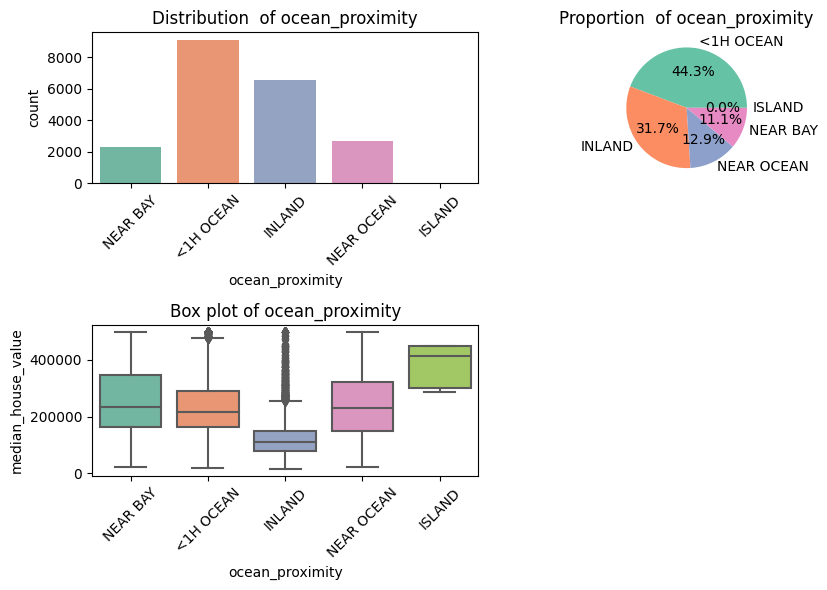

In [12]:
def plot_cat(cat_cols):

    plt.figure(figsize=(9,6))
    # plot countplot to get the Distribution  of each type 
    plt.subplot(2,2,1)
    sns.countplot(data = df , x =cat_cols[0] , palette='Set2')
    plt.title(f"Distribution  of {cat_cols[0]}")
    plt.xticks(rotation = 45)

    # plot Pie plot to get the Proportion  of each type 
    plt.subplot(2,2,2)
    counts = df[cat_cols[0]].value_counts()
    plt.pie(counts , labels=counts.index , autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f"Proportion  of {cat_cols[0]}")
    

    # plot boxplot to get the relation with the target
    plt.subplot(2,2,3)
    sns.boxplot(data=df, x=cat_cols[0], y='median_house_value' ,palette='Set2')
    plt.title(f"Box plot of {cat_cols[0]}")
    plt.xticks(rotation = 45)
    
    plt.tight_layout()   # to prevent overlapping
    plt.show()


plot_cat(cat_cols)    

In [13]:
#  check mean  of prices in each type of ocean_proximity

df.groupby(cat_cols[0])["median_house_value"].mean().sort_values()

ocean_proximity
INLAND        124805.392001
<1H OCEAN     240084.285464
NEAR OCEAN    249433.977427
NEAR BAY      259212.311790
ISLAND        380440.000000
Name: median_house_value, dtype: float64

* Analysis numerical Features

In [14]:
num_cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [15]:
len(num_cols)

9

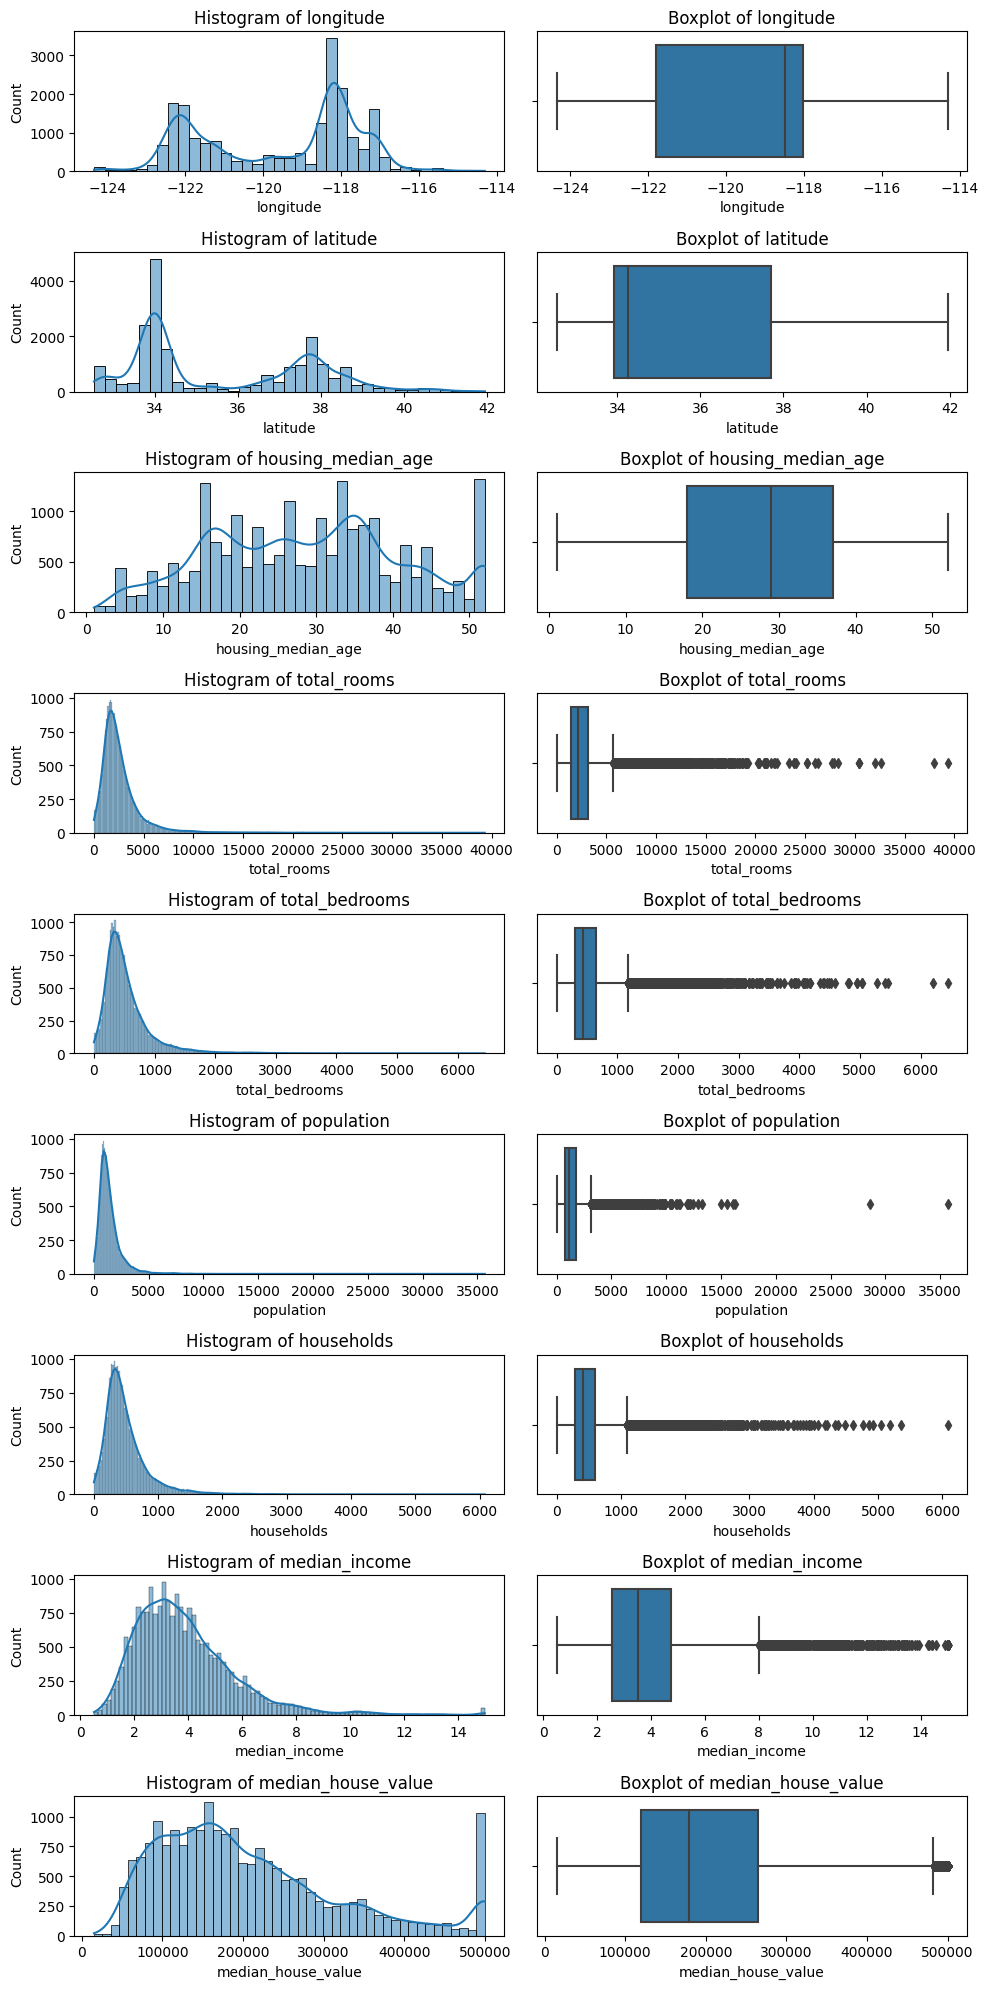

In [16]:
def plot_num(num_cols):
    plt.figure(figsize=(10, 20))
    
    for i,col in enumerate(num_cols):
        # plot histogram to visualize distribution
        plt.subplot(len(num_cols), 2, 2*i + 1)
        sns.histplot(data =df,x=col,kde=True)
        plt.title(f"Histogram of {col}")

        # Boxplot to check distribution and outliers
        plt.subplot(len(num_cols), 2, 2*i + 2)
        sns.boxplot(data=df, x=col)
        plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

plot_num(num_cols)        

In [17]:
# ckeck skewness

for col in num_cols:
    print(f"Skewness of {col} : {df[col].skew()}")

Skewness of longitude : -0.2978012079524363
Skewness of latitude : 0.46595300370997
Skewness of housing_median_age : 0.06033063759913685
Skewness of total_rooms : 4.147343450632158
Skewness of total_bedrooms : 3.459546331523342
Skewness of population : 4.935858226727124
Skewness of households : 3.410437711667147
Skewness of median_income : 1.6466567021344465
Skewness of median_house_value : 0.9777632739098342


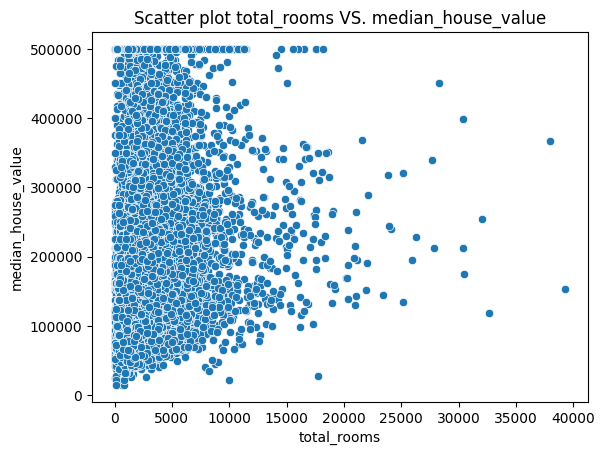

In [18]:
# check scatter plot between (median_house_value) and (total_rooms)
sns.scatterplot(data = df , x ='total_rooms' , y ='median_house_value')
plt.title("Scatter plot total_rooms VS. median_house_value")
plt.show()

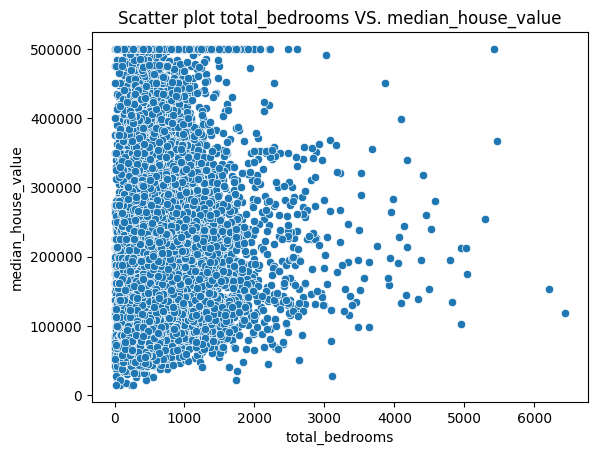

In [19]:
# check scatter plot between (median_house_value) and (total_bedrooms)
sns.scatterplot(data = df , x ='total_bedrooms' , y ='median_house_value')
plt.title("Scatter plot total_bedrooms VS. median_house_value")
plt.show()

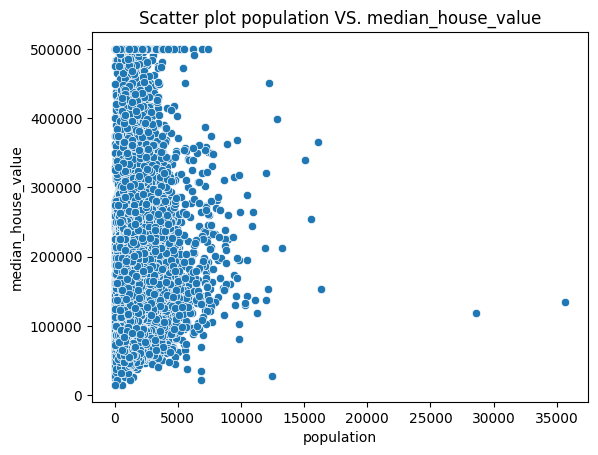

In [20]:
# check scatter plot between (median_house_value) and (population)
sns.scatterplot(data = df , x ='population' , y ='median_house_value')
plt.title("Scatter plot population VS. median_house_value")
plt.show()

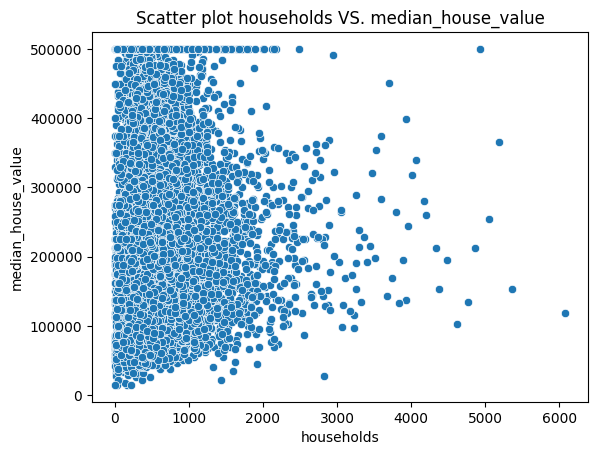

In [21]:
# check scatter plot between (median_house_value) and (households)
sns.scatterplot(data = df , x ='households' , y ='median_house_value')
plt.title("Scatter plot households VS. median_house_value")
plt.show()

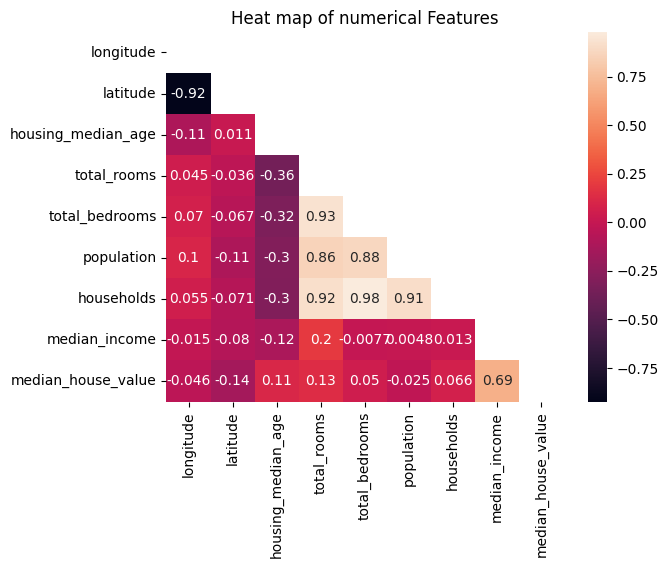

In [22]:
# get the relationship between numerical features

corr_mat = df[num_cols].corr()
mask = np.triu(np.ones_like(corr_mat))
sns.heatmap(corr_mat , mask = mask,annot=True)
plt.title("Heat map of numerical Features")
plt.show()

In [23]:
corr_mat

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [24]:
# get number of outliers in each column

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).sum()

outliers_count

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1287
total_bedrooms        1271
population            1196
households            1220
median_income          681
median_house_value    1071
dtype: int64

In [25]:
profile = ProfileReport(df, title="Data Profiling Report", explorative=True)
profile.to_notebook_iframe()  
profile.to_file("report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 46.73it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<hr/>
<h3 class="alert alert-success alertsuccess" style="margin-top: 15px" align ='center'>
 Preprocessing

</h3>
<hr/>

<hr/>
<h3 class="alert alert-success alertsuccess" style="margin-top: 15px" align ='center'>
 Handle Missing Values
</h3>
<hr/>

In [26]:
# from sklearn.impute import KNNImputer
# import pandas as pd


# numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


# knn_imputer = KNNImputer(n_neighbors=5)


# df_numeric_imputed = knn_imputer.fit_transform(df[numeric_cols])


# df_numeric_imputed = pd.DataFrame(df_numeric_imputed, columns=numeric_cols)


# df['total_bedrooms'] = df_numeric_imputed['total_bedrooms']

df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())


In [27]:
df['total_bedrooms'].isnull().sum()
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

<hr/>
<h3 class="alert alert-success alertsuccess" style="margin-top: 15px" align ='center'>
 Handle Outliers
</h3>
<hr/>

In [28]:


def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        
        df.loc[df[col] < lower_bound, col] = lower_bound
        
        df.loc[df[col] > upper_bound, col] = upper_bound
        
    return df

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df = remove_outliers_iqr(df, num_cols)

print(df.shape)


(20640, 10)


<hr/>
<h3 class="alert alert-success alertsuccess" style="margin-top: 15px" align ='center'>
 Encoding
</h3>
<hr/>

In [29]:
# df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
# map the categorical data

df['ocean_proximity'] = df['ocean_proximity'].map({
    'INLAND': 0, '<1H OCEAN': 1, 'NEAR OCEAN': 2,  'NEAR BAY': 3, 'ISLAND': 4

    
})

# ocean_proximity
# INLAND        124805.392001
# <1H OCEAN     240084.285464
# NEAR OCEAN    249433.977427
# NEAR BAY      259212.311790
# ISLAND        380440.000000
# Name: median_house_value, dtype: float64

In [30]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0      880.000           129.0   
1    -122.22     37.86                21.0     5698.375          1106.0   
2    -122.24     37.85                52.0     1467.000           190.0   
3    -122.25     37.85                52.0     1274.000           235.0   
4    -122.25     37.85                52.0     1627.000           280.0   

   population  households  median_income  ocean_proximity  median_house_value  
0         322       126.0       8.013025                3            452600.0  
1        2401      1092.5       8.013025                3            358500.0  
2         496       177.0       7.257400                3            352100.0  
3         558       219.0       5.643100                3            341300.0  
4         565       259.0       3.846200                3            342200.0

<hr/>
<h3 class="alert alert-success alertsuccess" style="margin-top: 15px" align ='center'>
 Scaling
</h3>
<hr/>

In [31]:
from sklearn.preprocessing import StandardScaler , RobustScaler , MinMaxScaler
import pickle

target_col = 'median_house_value'

X = df.drop(columns=[target_col])
y = df[target_col]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))


print("Shape of X after scaling:", X_scaled.shape)
print("Shape of y after scaling:", y_scaled.shape)

with open("scaler_y.pkl", "wb") as f:
    pickle.dump(scaler_y, f)


with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)



Shape of X after scaling: (20640, 9)
Shape of y after scaling: (20640, 1)


<hr/>
<h3 class="alert alert-success alertsuccess" style="margin-top: 15px" align ='center'>
 Feature Engineering
</h3>
<hr/>

In [32]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

feature_names = X.columns


model = LinearRegression()
n_features_to_select = 6
rfe = RFE(model, n_features_to_select=n_features_to_select)
rfe.fit(X_scaled, y_scaled)


selected_features = feature_names[rfe.support_]
X = X_scaled[:, rfe.support_]  

print("Selected Features:")
print(selected_features.tolist())



Selected Features:
['longitude', 'latitude', 'total_bedrooms', 'population', 'households', 'median_income']


<hr/>
<h3 class="alert alert-success alertsuccess" style="margin-top: 15px" align ='center'>
Trainig (Single Models)
</h3>
<hr/>

In [33]:

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


#

X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(
        n_estimators=250,
    max_depth=12,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features=.9,
    random_state=42,
    n_jobs=-1,
    oob_score=True
    ),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN Regressor": KNeighborsRegressor()
}


results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    
    r2_train = r2_score(y_train, y_train_pred) * 100
    r2_test = r2_score(y_test, y_test_pred) * 100
    
    results.append({
        "Model": name,
        "Train RMSE": rmse_train,
        "Test RMSE": rmse_test,
        "Train R² (%)": r2_train,
        "Test R² (%)": r2_test
    })


results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Test R² (%)", ascending=False)

print(" Results:")
results_df




 Results:


Model  Train RMSE  Test RMSE  Train R² (%)  Test R² (%)
2      Random Forest    0.074572   0.104863     90.553086    80.999050
1                SVR    0.122045   0.128370     74.696386    71.525219
3      Decision Tree    0.000000   0.132299    100.000000    69.755287
4      KNN Regressor    0.105725   0.136397     81.010950    67.852984
0  Linear Regression    0.145309   0.149164     64.130274    61.553312

<hr/>
<h3 class="alert alert-success alertsuccess" style="margin-top: 15px" align ='center'>
 Grid Search For each Single Model
</h3>
<hr/>

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring='r2')
grid_dt.fit(X_train, y_train)

y_train_pred = grid_dt.best_estimator_.predict(X_train)
y_test_pred = grid_dt.best_estimator_.predict(X_test)
best_dt = grid_dt.best_estimator_

print("Best Params:", grid_dt.best_params_)
print("Train R²: {:.2%}".format(r2_score(y_train, y_train_pred)))
print("Test R²: {:.2%}".format(r2_score(y_test, y_test_pred)))


Best Params: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Train R²: 92.08%
Test R²: 75.74%


In [35]:


from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score



knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_knn.fit(X_train, y_train)

y_train_pred = grid_knn.best_estimator_.predict(X_train)
y_test_pred = grid_knn.best_estimator_.predict(X_test)
best_knn = grid_knn.best_estimator_

print("Best Params:", grid_knn.best_params_)
print("Train R²: {:.2%}".format(r2_score(y_train, y_train_pred)))
print("Test R²: {:.2%}".format(r2_score(y_test, y_test_pred)))


Best Params: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Train R²: 100.00%
Test R²: 71.32%


<hr/>
<h3 class="alert alert-success alertsuccess" style="margin-top: 15px" align ='center'>
 Ensemble Techniques
</h3>
<hr/>

<hr/>
<h3 class="alert alert-success alertsuccess" style="margin-top: 15px" align ='center'>
 Voting
</h3>
<hr/>

In [36]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

best_dt = best_dt      
rf =   RandomForestRegressor(n_estimators=250,
    max_depth=12,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features=.9,
    random_state=42,
    n_jobs=-1,
    oob_score=True )     
svr =  SVR()  
best_knn = best_knn     
lr = LinearRegression ()  


voting_model = VotingRegressor(
    estimators=[
        ('dt', best_dt),
        ('rf', rf),
        ('svr', svr),
        ('knn', best_knn),
        ('lr', lr)
    ]
)


voting_model.fit(X_train, y_train)


y_train_pred_vote = voting_model.predict(X_train)
y_test_pred_vote = voting_model.predict(X_test)


print("Voting Train R²: {:.2%}".format(r2_score(y_train, y_train_pred_vote)))
print("Voting Test R²: {:.2%}".format(r2_score(y_test, y_test_pred_vote)))


Voting Train R²: 91.21%
Voting Test R²: 78.31%


<hr/>
<h3 class="alert alert-success alertsuccess" style="margin-top: 15px" align ='center'>
 Stacking
</h3>
<hr/>

In [37]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


best_dt = best_dt
rf_base = RandomForestRegressor(n_estimators=250,
    max_depth=12,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features=.9,
    random_state=42,
    n_jobs=-1,
    oob_score=True)
svr = SVR()
best_knn = best_knn
lr = LinearRegression()


meta_model = RandomForestRegressor()


stacking_model = StackingRegressor(
    estimators=[
        ('dt', best_dt),
        ('rf', rf_base),
        ('svr', svr),
        ('knn', best_knn),
        ('lr', lr)
    ],
    final_estimator=meta_model
)


stacking_model.fit(X_train, y_train)


y_train_pred_stack = stacking_model.predict(X_train)
y_test_pred_stack = stacking_model.predict(X_test)


print("Stacking Train R²: {:.2%}".format(r2_score(y_train, y_train_pred_stack)))
print("Stacking Test R²: {:.2%}".format(r2_score(y_test, y_test_pred_stack)))


y_pred_original = scaler_y.inverse_transform(y_test_pred_stack.reshape(-1, 1))

print(y_pred_original)


Stacking Train R²: 89.14%
Stacking Test R²: 80.48%
[[ 53713.   ]
 [ 69007.   ]
 [442953.5  ]
 ...
 [479514.375]
 [ 73805.   ]
 [193278.   ]]


In [38]:
import joblib


joblib.dump(stacking_model, "stacking_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [39]:
import pickle
import numpy as np


with open("scaler_y.pkl", "rb") as f:
    scaler_y = pickle.load(f)


y_pred_original = scaler_y.inverse_transform(y_test_pred_stack.reshape(-1, 1))
print(y_pred_original)




[[ 53713.   ]
 [ 69007.   ]
 [442953.5  ]
 ...
 [479514.375]
 [ 73805.   ]
 [193278.   ]]
